In [1]:
SEED = 126

import os
import random as rn
import numpy as np

os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
rn.seed(SEED)

import tensorflow as tf
tf.random.set_seed(SEED)

# 보스턴 주택 가격 데이터세트(Boston Housing Dataset)

In [2]:
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

print(len(train_X), len(test_X))
print(train_X[0])
print(train_Y[0])

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


In [3]:
x_mean = train_X.mean(axis=0)
x_std = train_X.std(axis=0)
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157


In [4]:
import tensorflow as tf

tf.random.set_seed(126)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 52)                728       
_________________________________________________________________
dense_1 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_2 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


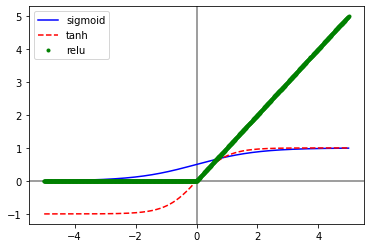

In [5]:
import matplotlib.pyplot as plt
import math
import numpy as np

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]
relu = [0 if z < 0 else z for z in x]

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.plot(x, relu, 'g.', label='relu')
plt.legend()
plt.show()

In [6]:
tf.random.set_seed(126)
history = model.fit(train_X, train_Y, epochs=50, batch_size=32, validation_split=0.25)

Epoch 1/50
10/10 [==============================] - 1s 10ms/step - loss: 1.9500 - val_loss: 1.0258
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 0.6526 - val_loss: 1.0113
Epoch 3/50
10/10 [==============================] - 0s 3ms/step - loss: 0.5247 - val_loss: 0.6702
Epoch 4/50
10/10 [==============================] - 0s 4ms/step - loss: 0.5535 - val_loss: 0.4628
Epoch 5/50
10/10 [==============================] - 0s 4ms/step - loss: 0.3913 - val_loss: 0.5113
Epoch 6/50
10/10 [==============================] - 0s 3ms/step - loss: 0.3498 - val_loss: 0.5492
Epoch 7/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2982 - val_loss: 0.4752
Epoch 8/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2954 - val_loss: 0.4564
Epoch 9/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2838 - val_loss: 0.3400
Epoch 10/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2655 - val_loss: 0.3796
Epoch 11/50
10/10 

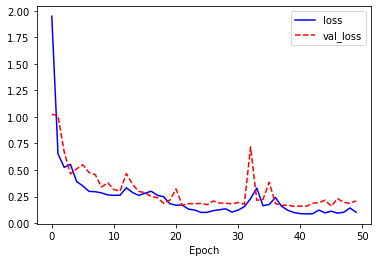

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [8]:
tf.random.set_seed(126)
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 1ms/step - loss: 0.2596


0.2595985531806946

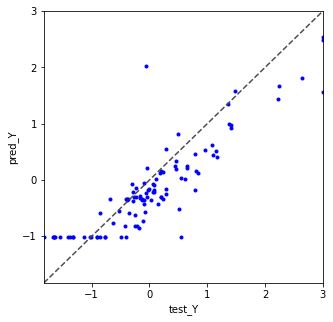

In [9]:
tf.random.set_seed(126)

import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y=x에 해당하는 대각선
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

In [20]:
tf.random.set_seed(126)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07), loss='mse')

history = model.fit(train_X, train_Y, epochs=50, batch_size=32, validation_split=0.25, callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')])

Epoch 1/50
10/10 [==============================] - 0s 9ms/step - loss: 1.9500 - val_loss: 1.0258
Epoch 2/50
10/10 [==============================] - 0s 4ms/step - loss: 0.6526 - val_loss: 1.0113
Epoch 3/50
10/10 [==============================] - 0s 3ms/step - loss: 0.5247 - val_loss: 0.6702
Epoch 4/50
10/10 [==============================] - 0s 4ms/step - loss: 0.5535 - val_loss: 0.4628
Epoch 5/50
10/10 [==============================] - 0s 4ms/step - loss: 0.3913 - val_loss: 0.5113
Epoch 6/50
10/10 [==============================] - 0s 3ms/step - loss: 0.3498 - val_loss: 0.5492
Epoch 7/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2982 - val_loss: 0.4752
Epoch 8/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2954 - val_loss: 0.4565
Epoch 9/50
10/10 [==============================] - 0s 3ms/step - loss: 0.2838 - val_loss: 0.3398
Epoch 10/50
10/10 [==============================] - 0s 4ms/step - loss: 0.2654 - val_loss: 0.3796
Epoch 11/50
10/10 [

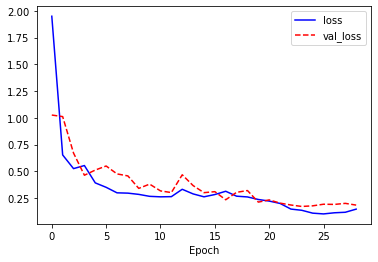

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [25]:
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 1ms/step - loss: 0.4206


0.42063912749290466

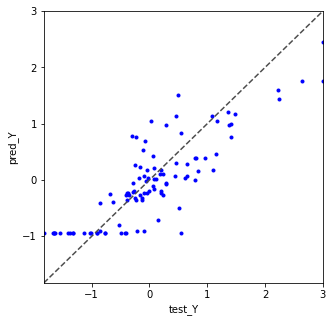

In [26]:
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()